In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from tqdm import tqdm
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import glob
import pandas as pan
import matplotlib.pyplot as plotter
import warnings
warnings.filterwarnings('ignore')

In [2]:
image_data= 'data'
pd.DataFrame(os.listdir(image_data),columns=['Files_Name'])

,Files_Name
0,battery
1,biological
2,brown-glass
3,cardboard
4,clothes
5,green-glass
6,metal
7,paper
8,plastic
9,shoes


In [3]:
files = [i for i in glob.glob(image_data + "//*//*")]
np.random.shuffle(files)
labels =[os.path.basename(os.path.dirname(i)) for i in files]
data = zip(files, labels)
dataframe = pan.DataFrame(data, columns = ["Image", "Label"])
dataframe

,Image,Label
0,data\shoes\shoes730.jpg,shoes
1,data\biological\biological719.jpg,biological
2,data\shoes\shoes1460.jpg,shoes
3,data\plastic\plastic861.jpg,plastic
4,data\clothes\clothes3596.jpg,clothes
...,...,...
13896,data\plastic\plastic16.jpg,plastic
13897,data\cardboard\cardboard312.jpg,cardboard
13898,data\plastic\plastic292.jpg,plastic
13899,data\clothes\clothes5127.jpg,clothes


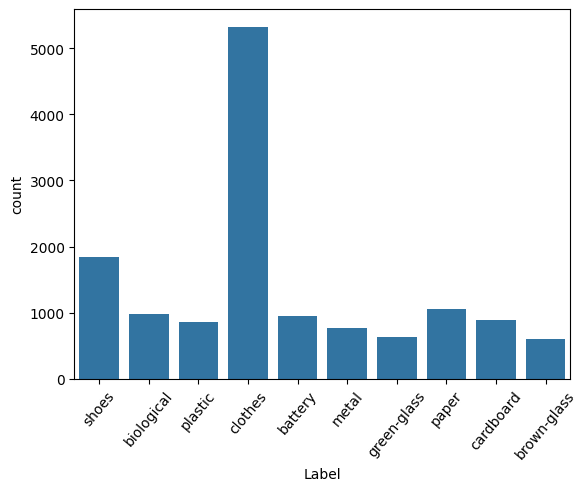

In [4]:
sns.countplot(x = dataframe["Label"])
plotter.xticks(rotation = 50);

In [5]:
train_data_dir =image_data
batch_size = 128
target_size = (224,224)
validation_split = 0.2

In [6]:
train= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=50,
    image_size=target_size,
    batch_size=batch_size,
)
validation= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=100,
    image_size=target_size,
    batch_size=batch_size,
)

Found 13901 files belonging to 10 classes.
Using 11121 files for training.
Found 13901 files belonging to 10 classes.
Using 2780 files for validation.


In [7]:
class_names = train.class_names
class_names

['battery',
 'biological',
 'brown-glass',
 'cardboard',
 'clothes',
 'green-glass',
 'metal',
 'paper',
 'plastic',
 'shoes']

In [16]:
train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

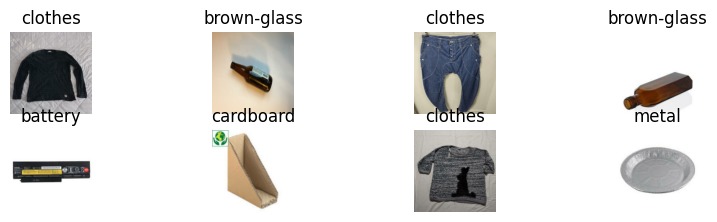

In [8]:
plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
    for i in range(8):
        ax = plt.subplot(8, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [9]:
import tensorflow as tf

#  EfficientNetV2B1 as a  base model
base_model = tf.keras.applications.EfficientNetV2B1(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False

# input layer
inputs = tf.keras.Input(shape=(224, 224, 3))


x = base_model(inputs, training=False)


x = tf.keras.layers.GlobalAveragePooling2D()(x)


x = tf.keras.layers.Dropout(0.5)(x)


outputs = tf.keras.layers.Dense(10, activation='softmax')(x)


model = tf.keras.Model(inputs, outputs)

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b1 (Functional)  │ (None, 7, 7, 1280)     │     6,931,124 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,943,934 (26.49 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 6,931,124 (26.44 MB)

In [10]:
pip install --upgrade tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
!pip install pydot

Defaulting to user installation because normal site-packages is not writeable


In [12]:
# callback
checkpoint =ModelCheckpoint("my_keras_model.keras", save_best_only=True)

In [13]:
early_stopping =EarlyStopping(patience=10, restore_best_weights=True)

In [14]:
model.compile(optimizer ='Adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
hist = model.fit(
    train, 
    epochs=15,
    validation_data=validation,  
    callbacks=[checkpoint, early_stopping]
)

Epoch 1/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 394s 4s/step - accuracy: 0.6299 - loss: 1.2323 - val_accuracy: 0.9522 - val_loss: 0.2456
Epoch 2/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 367s 4s/step - accuracy: 0.9318 - loss: 0.2766 - val_accuracy: 0.9640 - val_loss: 0.1558
Epoch 3/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 3779s 44s/step - accuracy: 0.9488 - loss: 0.1979 - val_accuracy: 0.9694 - val_loss: 0.1233
Epoch 4/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 481s 6s/step - accuracy: 0.9570 - loss: 0.1596 - val_accuracy: 0.9737 - val_loss: 0.1044
Epoch 5/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 557s 6s/step - accuracy: 0.9627 - loss: 0.1413 - val_accuracy: 0.9766 - val_loss: 0.0927
Epoch 6/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 639s 7s/step - accuracy: 0.9622 - loss: 0.1290 - val_accuracy: 0.9802 - val_loss: 0.0846
Epoch 7/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 430s 5s/step - accuracy: 0.9651 - loss: 0.1233 - val_accuracy: 0.9824 - val_loss: 0.0766
Epoch 8/15
87/87 ━━━━━━━━━━━━━━━━━━━━ 328s 4s/step - accuracy: 0.9698 - loss: 0.1101 - val_accuracy: 0.9827 -

In [18]:
score, acc = model.evaluate(validation)
print('Test Loss =', score)
print('Test Accuracy =', acc)

22/22 ━━━━━━━━━━━━━━━━━━━━ 60s 3s/step - accuracy: 0.9870 - loss: 0.0498
Test Loss = 0.05161183327436447
Test Accuracy = 0.9866906404495239


In [19]:
hist_=pd.DataFrame(hist.history)
hist_

,accuracy,loss,val_accuracy,val_loss
0,0.800108,0.740444,0.952158,0.245570
1,0.937775,0.252044,0.964029,0.155841
2,0.948746,0.189755,0.969424,0.123329
3,0.958187,0.157495,0.973741,0.104433
4,0.962054,0.141930,0.976619,0.092653
5,0.961874,0.128727,0.980216,0.084571
6,0.966100,0.119979,0.982374,0.076597
7,0.969068,0.110702,0.982734,0.071321
8,0.968528,0.110442,0.984892,0.066582
9,0.968798,0.105484,0.985252,0.062389


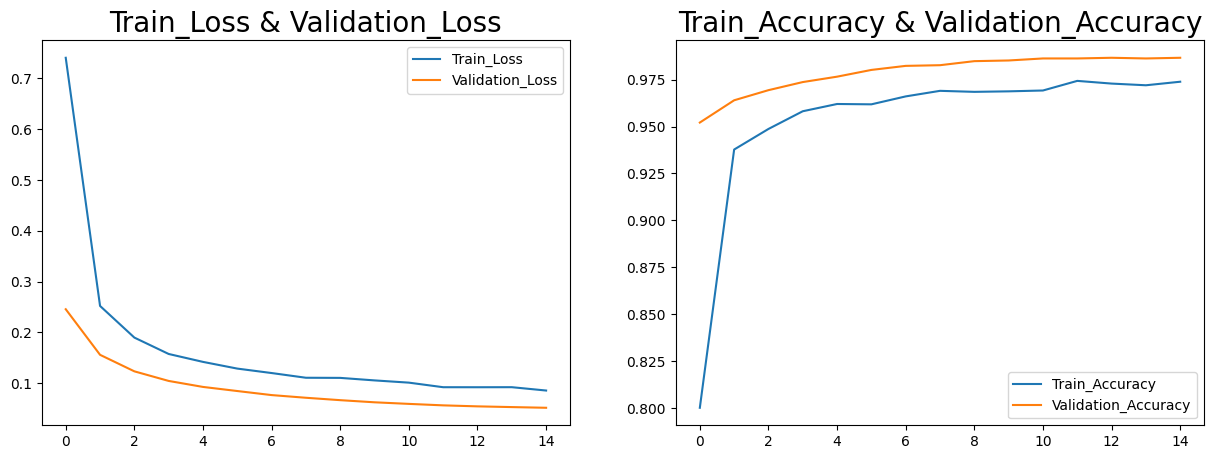

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()

In [22]:
X_val,y_val,y_pred=[],[],[]
for images, labels in validation:
    y_val.extend(labels.numpy())
    X_val.extend(images.numpy())
predictions=model.predict(np.array(X_val))
for i in predictions:
    y_pred.append(np.argmax(i))
df=pd.DataFrame()
df['Actual'],df['Prediction']=y_val,y_pred
df

87/87 ━━━━━━━━━━━━━━━━━━━━ 74s 669ms/step


,Actual,Prediction
0,4,4
1,4,4
2,7,7
3,4,4
4,2,2
...,...,...
2775,4,4
2776,4,4
2777,4,4
2778,4,4


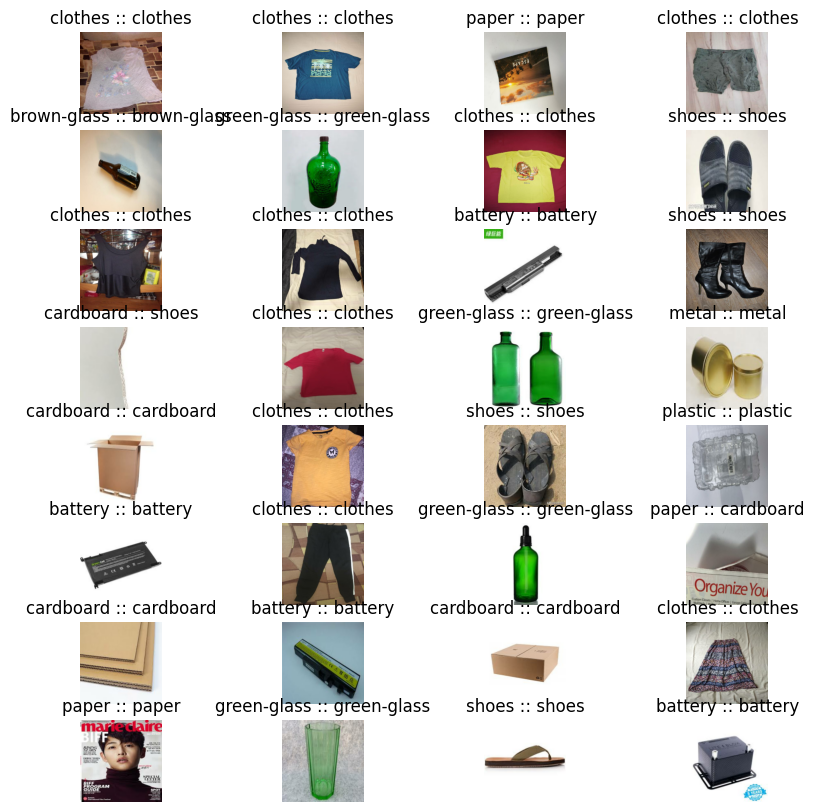

In [23]:
plt.figure(figsize=(10,10))
for i in range(32):
    ax = plt.subplot(8, 4, i + 1)
    plt.imshow(X_val[i].astype("uint8"))
    plt.title(f'{class_names[y_val[i]]} :: {class_names[y_pred[i]]}')
    plt.axis("off")

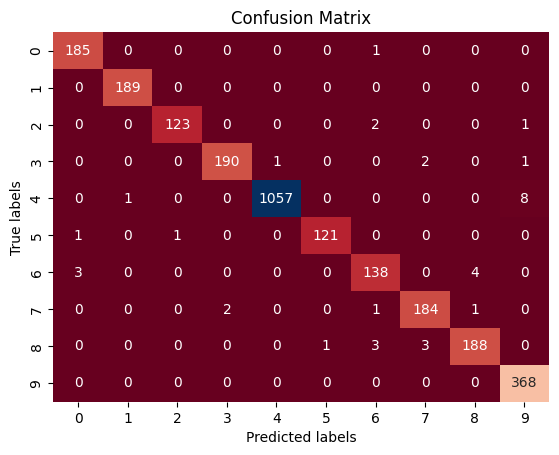

array([[ 185,    0,    0,    0,    0,    0,    1,    0,    0,    0],
       [   0,  189,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,  123,    0,    0,    0,    2,    0,    0,    1],
       [   0,    0,    0,  190,    1,    0,    0,    2,    0,    1],
       [   0,    1,    0,    0, 1057,    0,    0,    0,    0,    8],
       [   1,    0,    1,    0,    0,  121,    0,    0,    0,    0],
       [   3,    0,    0,    0,    0,    0,  138,    0,    4,    0],
       [   0,    0,    0,    2,    0,    0,    1,  184,    1,    0],
       [   0,    0,    0,    0,    0,    1,    3,    3,  188,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,  368]],
      dtype=int64)

In [24]:
ax= plt.subplot()
CM = confusion_matrix(y_val,y_pred)
sns.heatmap(CM, annot=True, fmt='g', ax=ax,cbar=False,cmap='RdBu')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
plt.show()
CM

In [25]:
Acc = accuracy_score(y_val,y_pred)
print("accuracy is: {0:.4f}%".format(Acc * 100))

accuracy is: 98.6691%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


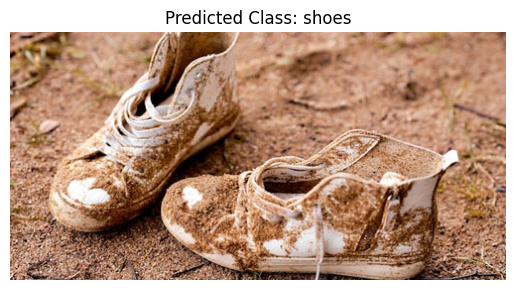

In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path, target_size=(224, 224)):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    return img_array

# Define a function to make predictions on a single image
def predict_single_image(image_path, model):
    preprocessed_img = preprocess_image(image_path)
    prediction = model.predict(preprocessed_img)
    predicted_class = np.argmax(prediction[0])  # Get the index of the class with the highest probability
    return predicted_class

# Path to the image you want to test
image_path = "shoes.jpeg"

# Make a prediction on the single image
predicted_class_index = predict_single_image(image_path, model)

# Map predicted class index to class name
class_names = ['battery', 'biological', 'brown-glass', 'cardboard', 'clothes', 'green-glass', 'metal', 'paper', 'plastic', 'shoes']
predicted_class_name = class_names[predicted_class_index]

# Display the image and predicted class
img = plt.imread(image_path)
plt.imshow(img)
plt.title(f"Predicted Class: {predicted_class_name}")
plt.axis('off')
plt.show()


In [27]:
model.save('model.h5')
model = tf.keras.models.load_model('model.h5')
